# **I. PROBLEMS UNDERSTANDING**
#1. Context:
- SuperStore is a global retail company offering a diverse range of products. Currently, the Head of the Marketing Team needs the DA team to segment customer groups and provide actionable insights using RFM analysis through Python. These insights will help the MKT Team gain a deeper understanding of their current customers and devise tailored strategies to effectively engage with different customer segments.

#2. Objective:
- Use Python to segment Superstore's customers depend on RFM Model
- Provide insights for the marketing team
- Help MKT and Sales team to evelop effective marketing strategies through this report

# #3. How to solve the problem?
##3.1 EDA
  - Check data info
  - Check missing/duplicate value, outliers, etc
  - Check data type
  - Find the reasons behind and make decision to solve

##3.2 Data Processing
- Feature Engineering for RFM: Calculate the R, F, M scores for each customer.
- Scoring and Segmentation: Assign scores for each R, F, and M metric, respectively, on a 1-5 scale.
- Group customers into segments based on their RFM scores using a standard classification method.
##3.3 Data visualization
- Visualization and Analysis: Customer Segment (treemap), CLV (Histogram), Segement History by time (Stacked Area Chart)
- Analyze customer behavior within each segment.
##3.4 Recommations
- Recommendations and Insights: Suggest specific strategies for each segment.
- Recommend the most important metric to focus on.




#II. PRACTICE

In [5]:
pip install squarify

In [6]:
# import required libraries for dataframe and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify

In [7]:
# Load data into Colab
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the project folder
path = '/content/drive/MyDrive/Python_Nguyễn Hoàng Đỗ Uyên_RFM Project/'

# Load data from Excel file
ecommerce = pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name='ecommerce retail')
segmentation = pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name='Segmentation')

# Convert the files to CSV format
ecommerce.to_csv(path + 'ecommerce.csv', index=False)
segmentation.to_csv(path + 'segmentation.csv', index=False)


Mounted at /content/drive


**1. EDA**

In [8]:
#Print head
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
pip install pandas-profiling[notebook]

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3bf5777aa2fbbe3dea96e68bfe8af9d68c3cc371bbd187f426fc4780585d0287
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
   

In [10]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport

# Create report
profile = ProfileReport(ecommerce, title="Profiling Report", explorative=True)

# Show report in notebook
profile.to_notebook_iframe()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.1/392.1 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: multimethod
    Found existing installation: multimethod 2.0
    Uninstalling multimethod-2.0:
      Successfully uninstalled multimethod-2.0
  Attempting uninstall: imagehash
    Found existing installation: ImageHash 4.3.2
    Uninstalling ImageHash-4.3.2:
      Successfully uninstalled ImageHash-4.3.2
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**1. Check data type và lọc các dữ liệu chưa phù hợp**

In [11]:
# Check the general information of df
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
# Check Data Summary
ecommerce.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Nhận xét: Data có cột Quantity & Unit Price bị âm là không hợp lí -> Cần check kĩ hơn

In [13]:
# Deeper Analysis on Stock Code and Invoice No
stock_code = ecommerce[['StockCode','InvoiceNo']].groupby('StockCode')['InvoiceNo'].agg('count').reset_index().sort_values(by='InvoiceNo', ascending=False)
print(stock_code.head(5))
print(stock_code.tail(5))
print(len(stock_code))


     StockCode  InvoiceNo
3670    85123A       2313
1271     22423       2203
3659    85099B       2159
2517     47566       1727
103      20725       1639
     StockCode  InvoiceNo
3318    84031b          1
3317    84031a          1
3306    82613a          1
213      20950          1
4069         m          1
4070


In [14]:
description_check = ecommerce[['Description','InvoiceNo']].groupby(['Description']).count().reset_index().sort_values(by = ['InvoiceNo'], ascending = False)
print(description_check.head())
print(len(description_check))

                             Description  InvoiceNo
3918  WHITE HANGING HEART T-LIGHT HOLDER       2369
2915            REGENCY CAKESTAND 3 TIER       2200
1866             JUMBO BAG RED RETROSPOT       2159
2471                       PARTY BUNTING       1727
2054             LUNCH BAG RED RETROSPOT       1638
4223


Stock Code chỉ có 4070 code nhưng Description 4223 mã -> Có sự mismatch cần check thêm

In [15]:
# Export the DataFrame to a CSV file for order verification
description_check.to_excel(path + 'description_check.xlsx')

In [16]:
description_check_update = pd.read_excel(path + 'description_check_update.xlsx')
print(description_check_update)

      Unnamed: 0                         Description  StockCode  Error
0           3918  WHITE HANGING HEART T-LIGHT HOLDER       2369    NaN
1           2915            REGENCY CAKESTAND 3 TIER       2200    NaN
2           1866             JUMBO BAG RED RETROSPOT       2159    NaN
3           2471                       PARTY BUNTING       1727    NaN
4           2054             LUNCH BAG RED RETROSPOT       1638    NaN
...          ...                                 ...        ...    ...
4218        2319          ORANGE FELT VASE + FLOWERS          1    NaN
4219        2318        OPULENT VELVET SET/3 CANDLES          1    NaN
4220        2315                   OOPS ! adjustment          1    1.0
4221        2314               OOH LA LA DOGS COLLAR          1    1.0
4222        4222                   wrongly sold sets          1    1.0

[4223 rows x 4 columns]


In [17]:
# Merge description_check_update with ecommerce
ecommerce_update = ecommerce.merge(description_check_update[['Description','Error']], how='left', on='Description')
print(ecommerce_update)
print(ecommerce_update[ecommerce_update['Error'] == 1].shape)
print(ecommerce_update.shape)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Error  


In [18]:
# Filter orders where quantity is less than 0
ecommerce_update[ecommerce_update['Quantity'] < 0 ].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,NaN
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,NaN
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,NaN
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,NaN
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,NaN


In [19]:
# Filter orders where quantity < 0 and Invoice No starts with 'C'
ecommerce_update['InvoiceNo'] = ecommerce_update['InvoiceNo'].astype(str)
ecommerce_update['cancel_invoice'] = ecommerce_update.apply(
    lambda x: True if x['Quantity'] < 0 and x['InvoiceNo'].startswith('C') else False, axis=1)

# Check for orders where qty < 0 but status is False
check_invalid_invoice = ecommerce_update[(ecommerce_update['cancel_invoice'] == False) & (ecommerce_update['Quantity'] < 0)]
print(len(check_invalid_invoice))
check_invalid_invoice.head()



1336


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error,cancel_invoice
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,NaN,False
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,NaN,False
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,NaN,False
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,NaN,False
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,NaN,False


Filter orders where qty < 0 but InvoiceNo does NOT start with "C" for deeper understanding


In [20]:
check_invalid_invoice.to_excel(path + "check_invalid_invoice.xlsx")

After checking, the orders that are not canceled but still have qty < 0 are due to description being NaN or incorrect.

In [21]:
#Filtered UnitPrice <0
print(len(ecommerce_update[ecommerce_update['UnitPrice'] < 0 ]))
ecommerce_update[ecommerce_update['UnitPrice'] < 0 ].head()

2


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error,cancel_invoice
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,1.0,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,1.0,False


✨ General Observations

**Data Types:**

The following columns have inappropriate data types and should be converted to **strings** for easier processing:

- **InvoiceNo**, **StockCode**, **Description**, **CustomerID**, **Country**.

**Data Values:**

- **Quantity < 0 & InvoiceNo starts with 'C'** → These transactions indicate **canceled orders** and should be **removed** from the dataset.
- **Quantity < 0 but InvoiceNo does NOT start with 'C'** → These records contain **incorrect descriptions** and should be **excluded** from the dataset.
- **UnitPrice < 0 & incorrect Description** → These are **invalid transactions** and should also be **removed** from the dataset.


**1. Reformat dtype**

In [22]:
# Convert selected columns to string type
column_list =["InvoiceNo", "StockCode", "Description", "CustomerID", "Country"]
for c in column_list:
  ecommerce_update[c] = ecommerce_update[c].astype(str)
ecommerce_update['InvoiceDate'] = pd.to_datetime(ecommerce_update['InvoiceDate'])

**2. Removing Invalid Transactions for calculating RFM**

In [23]:
#Xử lý các data không phù hợp
#1. Drop các đơn hàng bị hủy (start with C)
ecommerce_update = ecommerce_update[~ecommerce_update['InvoiceNo'].str.startswith("C")]
#2. Drop các đơn hàng có Qty < 0 nhưng InvoiceNo không bắt đầu bằng chữ C do sai description -> Xóa tất cả các đơn hàng <0 này
ecommerce_update = ecommerce_update[ecommerce_update['Quantity'] > 0]
#3. Drop các đơn hàng được đánh dấu Error = 1 do sai Description
ecommerce_update = ecommerce_update[ecommerce_update['Error'] != 1]
#4. Drop các đơn hàng có UnitPrice < 0
ecommerce_update = ecommerce_update[ecommerce_update['UnitPrice'] > 0]


In [24]:
ecommerce_update

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error,cancel_invoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,False
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,NaN,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,NaN,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,NaN,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,NaN,False


**3. Check missing value**

<Axes: >

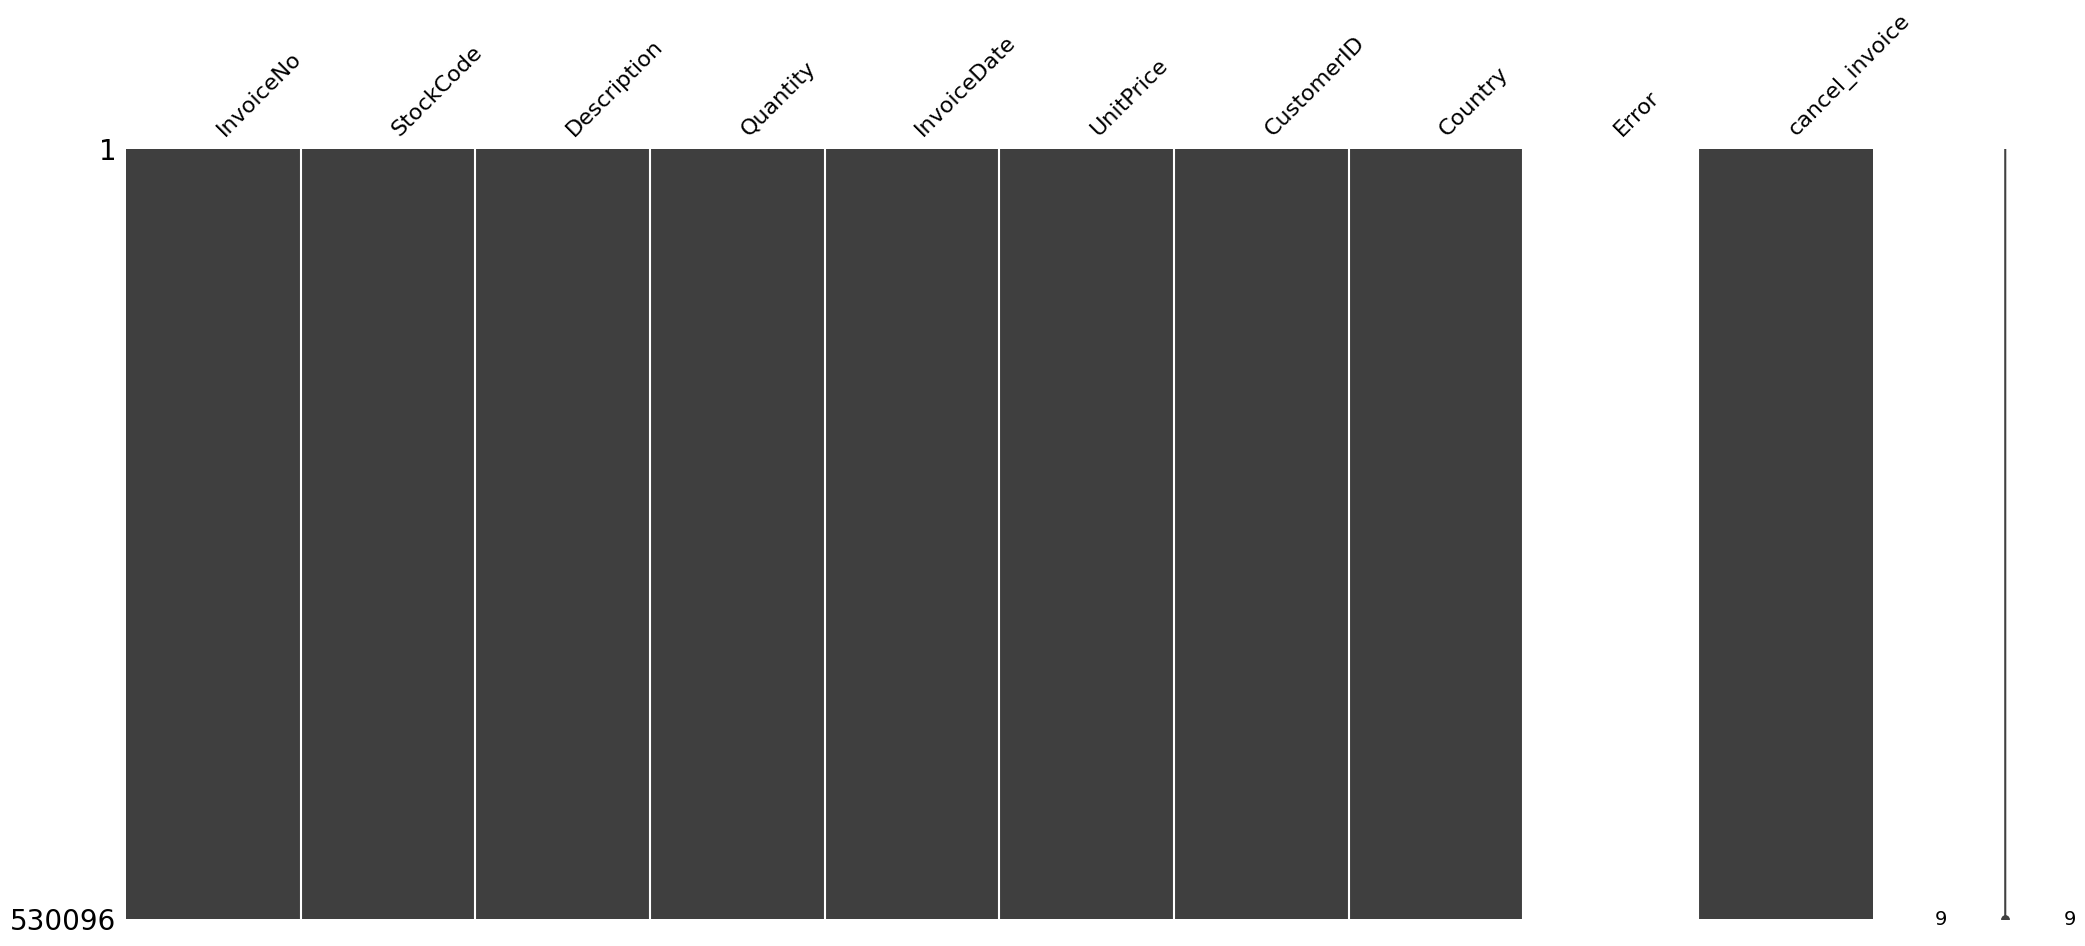

In [25]:
# Visualizing missing data
import missingno as msno
msno.matrix(ecommerce_update)

In [26]:
# Handling missing values in CustomerID
ecommerce_update['CustomerID'] = ecommerce_update['CustomerID'].replace(["nan", "", " "], np.nan)
# Creating a dictionary with missing value counts and percentages
missing_dict = {
    'volume': ecommerce_update.isnull().sum(),
    '%': (ecommerce_update.isnull().sum() / ecommerce_update.shape[0]) * 100
}
missing_ecommerce = pd.DataFrame.from_dict(missing_dict)
print(missing_ecommerce)

                volume           %
InvoiceNo            0    0.000000
StockCode            0    0.000000
Description          0    0.000000
Quantity             0    0.000000
InvoiceDate          0    0.000000
UnitPrice            0    0.000000
CustomerID      132216   24.941897
Country              0    0.000000
Error           530096  100.000000
cancel_invoice       0    0.000000


In [27]:
#Check overview data to understand why CustomerID has many NaN values
ecommerce_update[ecommerce_update['CustomerID'].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error,cancel_invoice
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,NaN,False
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,NaN,False
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,NaN,False
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,NaN,False
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,NaN,False
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,NaN,False
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,NaN,False
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,NaN,False
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,NaN,False
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,NaN,False


In [28]:
ecommerce_update[ecommerce_update['CustomerID'].isna()].tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error,cancel_invoice
541531,581498,84997d,CHILDRENS CUTLERY POLKADOT PINK,1,2011-12-09 10:26:00,8.29,NaN,United Kingdom,NaN,False
541532,581498,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,1,2011-12-09 10:26:00,4.13,NaN,United Kingdom,NaN,False
541533,581498,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,2011-12-09 10:26:00,16.63,NaN,United Kingdom,NaN,False
541534,581498,85049a,TRADITIONAL CHRISTMAS RIBBONS,5,2011-12-09 10:26:00,3.29,NaN,United Kingdom,NaN,False
541535,581498,85049e,SCANDINAVIAN REDS RIBBONS,4,2011-12-09 10:26:00,3.29,NaN,United Kingdom,NaN,False
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,NaN,False
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,NaN,False
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,NaN,False
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,NaN,False
541540,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,NaN,United Kingdom,NaN,False


There isn't abnormal in CustomerID

Hypothesis: Are the missing CustomerIDs concentrated in the United Kingdom, or are they evenly distributed across countries? Are they missing only during a specific period, or do they occur consistently every month?

In [29]:
#Check missing value group by country
customerid_by_country = ecommerce_update[ecommerce_update['CustomerID'].isna()].groupby('Country').size().reset_index(name='Missing_CustomerID').sort_values(by='Missing_CustomerID', ascending=False)
print(customerid_by_country)

          Country  Missing_CustomerID
7  United Kingdom              130798
1            EIRE                 654
3       Hong Kong                 284
8     Unspecified                 202
6     Switzerland                 125
2          France                  66
4          Israel                  47
5        Portugal                  39
0         Bahrain                   1


In [30]:
ecommerce_update['Date'] = pd.to_datetime(ecommerce_update['InvoiceDate']).dt.date
ecommerce_update['Month'] = pd.to_datetime(ecommerce_update['InvoiceDate']).dt.strftime('%Y/%m')

ecommerce_update.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error,cancel_invoice,Date,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN,False,2010-12-01,2010/12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,False,2010-12-01,2010/12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN,False,2010-12-01,2010/12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,False,2010-12-01,2010/12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,False,2010-12-01,2010/12


In [31]:
#Check missing value by Date
customerid_by_date = ecommerce_update[ecommerce_update['CustomerID'].isna()].groupby('Date').size().reset_index(name='Missing_CustomerID_by_date').sort_values(by='Missing_CustomerID_by_date', ascending=False)
print(customerid_by_date)
print()

#Check missing value by Month
customerid_by_month = ecommerce_update[ecommerce_update['CustomerID'].isna()].groupby('Month').size().reset_index(name='Missing_CustomerID_by_month').sort_values(by='Missing_CustomerID_by_month', ascending=False)
print(customerid_by_month)

           Date  Missing_CustomerID_by_date
192  2011-08-30                        2827
14   2010-12-17                        2383
271  2011-12-08                        2335
268  2011-12-05                        1923
4    2010-12-06                        1871
..          ...                         ...
80   2011-03-27                           1
61   2011-03-02                           1
185  2011-08-19                           1
176  2011-08-07                           1
64   2011-03-06                           1

[273 rows x 2 columns]

      Month  Missing_CustomerID_by_month
11  2011/11                        18838
0   2010/12                        15322
1   2011/01                        13075
7   2011/07                        11820
10  2011/10                         9750
9   2011/09                         9233
6   2011/06                         8792
3   2011/03                         8628
5   2011/05                         7844
12  2011/12                         7

In [32]:
print(type(ecommerce_update))

<class 'pandas.core.frame.DataFrame'>


The missing CustomerID occurs consistently across months and countries rather than being concentrated in a specific region or time period.

→ **Possible Cause**: Human errors in updating customer information or system recording failures.
→ **Solution: CustomerID** cannot be replaced → **Drop the missing records.**

In [33]:
#Drop missing rows in CustomerId
ecommerce_update = ecommerce_update.dropna(subset=['CustomerID'])

In [34]:
ecommerce_update.shape
ecommerce_update.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397880 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       397880 non-null  object        
 1   StockCode       397880 non-null  object        
 2   Description     397880 non-null  object        
 3   Quantity        397880 non-null  int64         
 4   InvoiceDate     397880 non-null  datetime64[ns]
 5   UnitPrice       397880 non-null  float64       
 6   CustomerID      397880 non-null  object        
 7   Country         397880 non-null  object        
 8   Error           0 non-null       float64       
 9   cancel_invoice  397880 non-null  bool          
 10  Date            397880 non-null  object        
 11  Month           397880 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 36.8+ MB


**4. Check duplicate value**

In [35]:
ecommerce_duplicate = ecommerce_update[ecommerce_update.duplicated(subset=['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID'])]
print(ecommerce_duplicate.shape)

(10038, 12)


In [36]:
#Print 10 top rows of duplicate values
ecommerce_duplicate.head(10).sort_values(by='Quantity', ascending=False)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Error,cancel_invoice,Date,Month
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,NaN,False,2010-12-01,2010/12
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,NaN,False,2010-12-01,2010/12
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,NaN,False,2010-12-01,2010/12
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,NaN,False,2010-12-01,2010/12
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,NaN,False,2010-12-01,2010/12
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,NaN,False,2010-12-01,2010/12
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,NaN,False,2010-12-01,2010/12
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,NaN,False,2010-12-01,2010/12
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,NaN,False,2010-12-01,2010/12
568,536412,22940,FELTCRAFT CHRISTMAS FAIRY,1,2010-12-01 11:49:00,4.25,17920.0,United Kingdom,NaN,False,2010-12-01,2010/12


**Detect in two cases:**

**Same Quantity**: Completely duplicated (possibly due to a system error recording duplicates) -> **Drop duplicates.**
**Different Quantity**: Partial due to a system error splitting orders -> **Sum the quantity twice**

In [37]:
# Detect exact duplicate rows based on 'InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID', and 'Quantity
invoice_duplicate_total = ecommerce_update[ecommerce_update.duplicated(subset=['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID','Quantity'])]
print(len(invoice_duplicate_total))
print(len(ecommerce_update))

5214
397880


In [38]:
#Group by 'InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID', and 'Quantity' and keep the first occurrence of other columns
ecommerce_update = ecommerce_update.groupby(['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID', 'Quantity'], as_index=False).agg({
    'UnitPrice': 'first',
    'Description': 'first',
    'Country': 'first',
    'Error': 'first',
    'cancel_invoice': 'first',
    'Date': 'first',
    'Month': 'first'
})
print(len(ecommerce_update))

392666


In [39]:
# After filtering out fully duplicated transactions, the remaining duplicates differ in quantity -> Sum Quantity
ecommerce_update = ecommerce_update.groupby(['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID'], as_index=False).agg({
    'Quantity': 'sum',
    'UnitPrice': 'first',
    'Description': 'first',
    'Country': 'first',
    'Error': 'first',
    'cancel_invoice': 'first',
    'Date': 'first',
    'Month': 'first'
})
print(len(ecommerce_update))

387842


In [40]:
#Recheck duplicate
ecommerce_duplicate = ecommerce_update[ecommerce_update.duplicated(subset=['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID'])]
print(ecommerce_duplicate.shape)

(0, 12)


In [41]:
ecommerce_update

,InvoiceNo,StockCode,InvoiceDate,CustomerID,Quantity,UnitPrice,Description,Country,Error,cancel_invoice,Date,Month
0,536365,21730,2010-12-01 08:26:00,17850.0,6,4.25,GLASS STAR FROSTED T-LIGHT HOLDER,United Kingdom,NaN,False,2010-12-01,2010/12
1,536365,22752,2010-12-01 08:26:00,17850.0,2,7.65,SET 7 BABUSHKA NESTING BOXES,United Kingdom,NaN,False,2010-12-01,2010/12
2,536365,71053,2010-12-01 08:26:00,17850.0,6,3.39,WHITE METAL LANTERN,United Kingdom,NaN,False,2010-12-01,2010/12
3,536365,84029E,2010-12-01 08:26:00,17850.0,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,NaN,False,2010-12-01,2010/12
4,536365,84029G,2010-12-01 08:26:00,17850.0,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,NaN,False,2010-12-01,2010/12
...,...,...,...,...,...,...,...,...,...,...,...,...
387837,581587,22730,2011-12-09 12:50:00,12680.0,4,3.75,ALARM CLOCK BAKELIKE IVORY,France,NaN,False,2011-12-09,2011/12
387838,581587,22899,2011-12-09 12:50:00,12680.0,6,2.10,CHILDREN'S APRON DOLLY GIRL,France,NaN,False,2011-12-09,2011/12
387839,581587,23254,2011-12-09 12:50:00,12680.0,4,4.15,CHILDRENS CUTLERY DOLLY GIRL,France,NaN,False,2011-12-09,2011/12
387840,581587,23255,2011-12-09 12:50:00,12680.0,4,4.15,CHILDRENS CUTLERY CIRCUS PARADE,France,NaN,False,2011-12-09,2011/12


**II. Data Processing**

**1. Prepare R, F, M  for calculating **

In [42]:
#Calculate the lastest transaction date
last_day = ecommerce_update['Date'].max()

# Create column 'revenue'
ecommerce_update['revenue'] = ecommerce_update['Quantity'] * ecommerce_update['UnitPrice']

# Create RFM df
RFM_df = ecommerce_update.groupby('CustomerID').agg(
    Recency=('Date', lambda x: (last_day - x.max()).days),
    Frequency=('InvoiceNo', 'count'),
    Monetary=('revenue', 'sum')
).reset_index()
RFM_df


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,27,1859.64
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4333,18280.0,277,10,180.60
4334,18281.0,180,7,80.82
4335,18282.0,7,12,178.05
4336,18283.0,3,689,2045.53


<Axes: xlabel='Recency'>

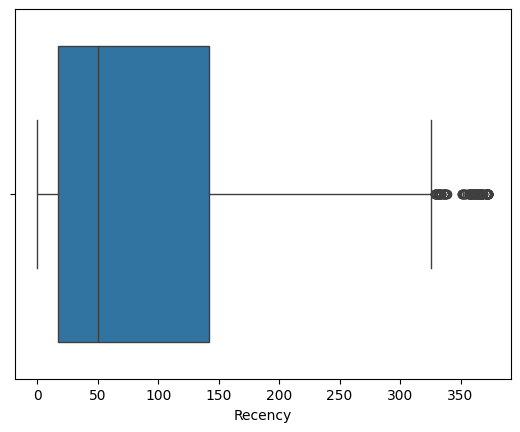

In [43]:
# Check outliers for the 'Recency' column
sns.boxplot(data=RFM_df, x='Recency')

<Axes: xlabel='Monetary'>

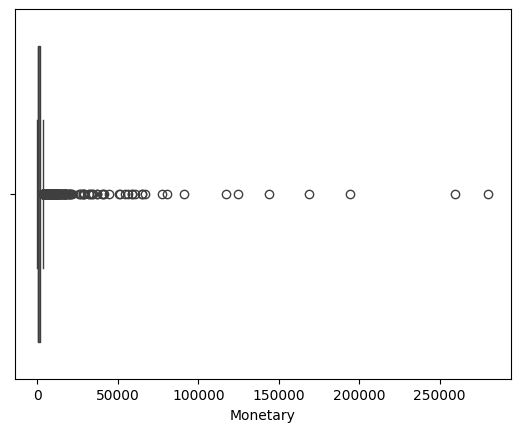

In [44]:
# Check outliers for the 'Monetary' column
sns.boxplot(data=RFM_df, x='Monetary')

<Axes: xlabel='Frequency'>

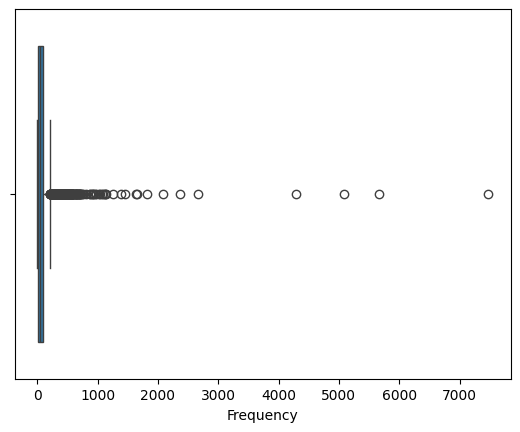

In [45]:
# Check outliers for the 'Frequency' column
sns.boxplot(data=RFM_df, x='Frequency')

**2. Drop outliers**

In [46]:
# Set the 95th percentile threshold for 'Recency'
R_update = RFM_df['Recency'].quantile(0.95)

# Set the 95th percentile threshold for 'Frequency'
F_update = RFM_df['Frequency'].quantile(0.95)

# Set the 95th percentile threshold for 'Monetary'
M_update = RFM_df['Monetary'].quantile(0.95)

# Filter out rows where any column exceeds the 95th percentile threshold
RFM_update = RFM_df[(RFM_df['Recency'] <= R_update) &
                     (RFM_df['Frequency'] <= F_update) &
                     (RFM_df['Monetary'] <= M_update)]


<Axes: xlabel='Recency'>

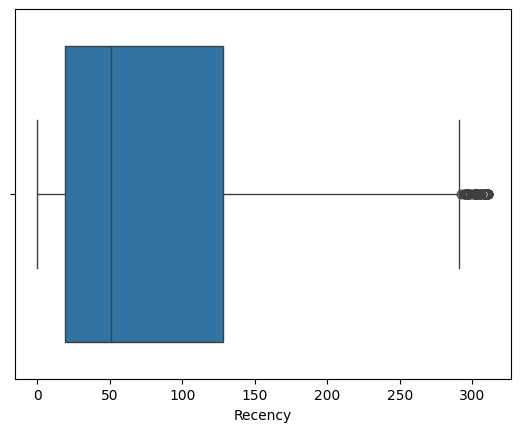

In [47]:
# Check for outliers in the 'Recency' column after filtering
sns.boxplot(data=RFM_update, x='Recency')

<Axes: xlabel='Frequency'>

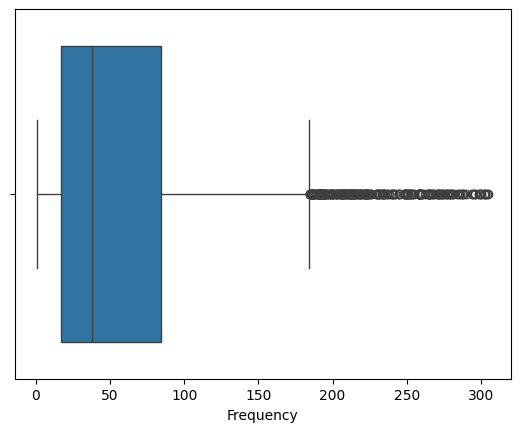

In [48]:
# Check for outliers in the 'Frequency' column after filtering
sns.boxplot(data=RFM_update, x='Frequency')

<Axes: xlabel='Monetary'>

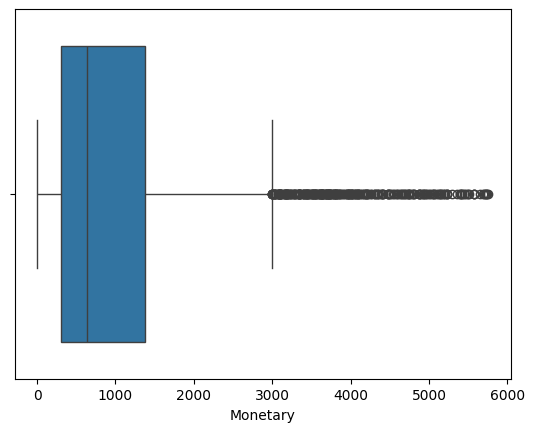

In [49]:
# Check for outliers in the 'Monetary' column after filtering
sns.boxplot(data=RFM_update, x='Monetary')

**3. Dùng Qcut để tính điểm RFM cho từng CustomerID **




In [50]:
# Recency score: Lower values indicate more recent purchases, so assign higher scores to lower recency values
RFM_update['R_score'] = pd.qcut(RFM_update['Recency'], 5, labels=range(5, 0, -1), duplicates='drop').astype(int)

# Frequency score: Higher values indicate more frequent purchases, so assign higher scores to higher frequency values
RFM_update['F_score'] = pd.qcut(RFM_update['Frequency'], 5, labels=range(1, 6), duplicates='drop').astype(int)

# Monetary score: Higher values indicate higher spending, so assign higher scores to higher monetary values
RFM_update['M_score'] = pd.qcut(RFM_update['Monetary'], 5, labels=range(1, 6), duplicates='drop').astype(int)

#Combine RFM scores into a single string to create the RFM segment
RFM_update['RFM'] = RFM_update['R_score'].astype(str) + \
                     RFM_update['F_score'].astype(str) + \
                     RFM_update['M_score'].astype(str)


<ipython-input-50-d72a64e9766e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_update['R_score'] = pd.qcut(RFM_update['Recency'], 5, labels=range(5, 0, -1), duplicates='drop').astype(int)
<ipython-input-50-d72a64e9766e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_update['F_score'] = pd.qcut(RFM_update['Frequency'], 5, labels=range(1, 6), duplicates='drop').astype(int)
<ipython-input-50-d72a64e9766e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [51]:
segmentation.head()

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."


In [52]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    11 non-null     object
 1   RFM Score  11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


In [53]:
# Flatten the segmentation table by splitting the 'RFM Score' column
segmentation['RFM Score'] = segmentation['RFM Score'].astype(str).str.split(',')
segmentation = segmentation.explode('RFM Score').reset_index(drop=True)

segmentation.head()

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454


In [54]:
#Trim the space
segmentation['RFM Score'] = segmentation['RFM Score'].str.strip()
#Merge segmentation & RFM df
RFM_final = RFM_update.merge(segmentation, how='left', left_on='RFM', right_on='RFM Score')
RFM_final

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM,Segment,RFM Score
0,12347.0,2,182,4310.00,5,5,5,555,Champions,555
1,12348.0,75,27,1859.64,2,2,5,225,At Risk,225
2,12349.0,18,73,1757.55,4,4,5,445,Champions,445
3,12350.0,310,17,334.40,1,2,2,122,Hibernating customers,122
4,12352.0,36,83,2042.24,3,4,5,345,Loyal,345
...,...,...,...,...,...,...,...,...,...,...
3796,18278.0,73,9,173.90,2,1,1,211,Hibernating customers,211
3797,18280.0,277,10,180.60,1,1,1,111,Lost customers,111
3798,18281.0,180,7,80.82,1,1,1,111,Lost customers,111
3799,18282.0,7,12,178.05,5,1,1,511,New Customers,511


In [55]:
RFM_final.describe()

,Recency,Frequency,Monetary,R_score,F_score,M_score
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.00000,3801.000000
mean,83.913181,60.528282,1043.831466,3.024993,2.97448,2.999474
std,84.325986,61.133799,1090.731812,1.425577,1.42649,1.414586
min,0.000000,1.000000,3.750000,1.000000,1.00000,1.000000
25%,19.000000,17.000000,306.450000,2.000000,2.00000,2.000000
50%,51.000000,38.000000,638.060000,3.000000,3.00000,3.000000
75%,128.000000,84.000000,1382.070000,4.000000,4.00000,4.000000
max,311.000000,305.000000,5756.890000,5.000000,5.00000,5.000000


# **III. VISUALIZATION**

**1. Contribution by Segmentation**

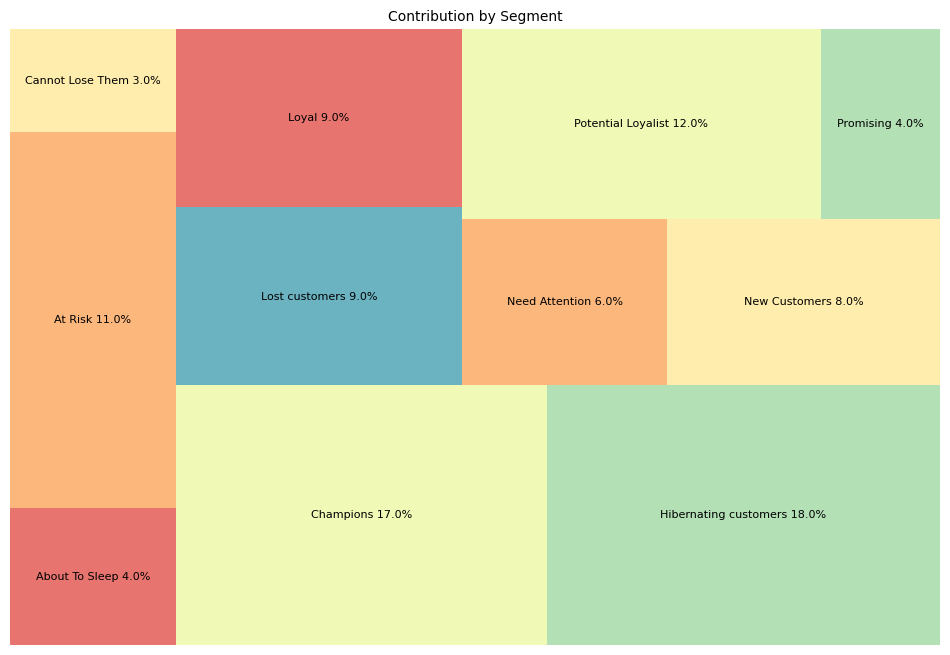

In [56]:
# Count the number of customers in each segment
count_segment_by_users = RFM_final[['CustomerID', 'Segment']].groupby(['Segment'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'Count'})

# Calculate the percentage of each segment
count_segment_by_users['percent_segment_by_users'] = round(count_segment_by_users['Count'] / count_segment_by_users['Count'].sum() * 100)

# Format segment names to include percentage
count_segment_by_users['Segment'] = count_segment_by_users['Segment'] + ' ' + count_segment_by_users['percent_segment_by_users'].astype(str) + '%'

# Plot a treemap to visualize segment contribution
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=count_segment_by_users['percent_segment_by_users'],
    label=count_segment_by_users['Segment'],
    color=sns.color_palette("Spectral"),
    alpha=0.8,
    text_kwargs={'fontsize': 8}
)
plt.title("Contribution by Segment", fontsize=10)
plt.axis('off')
plt.show()

**2. Segmentation by Spending**

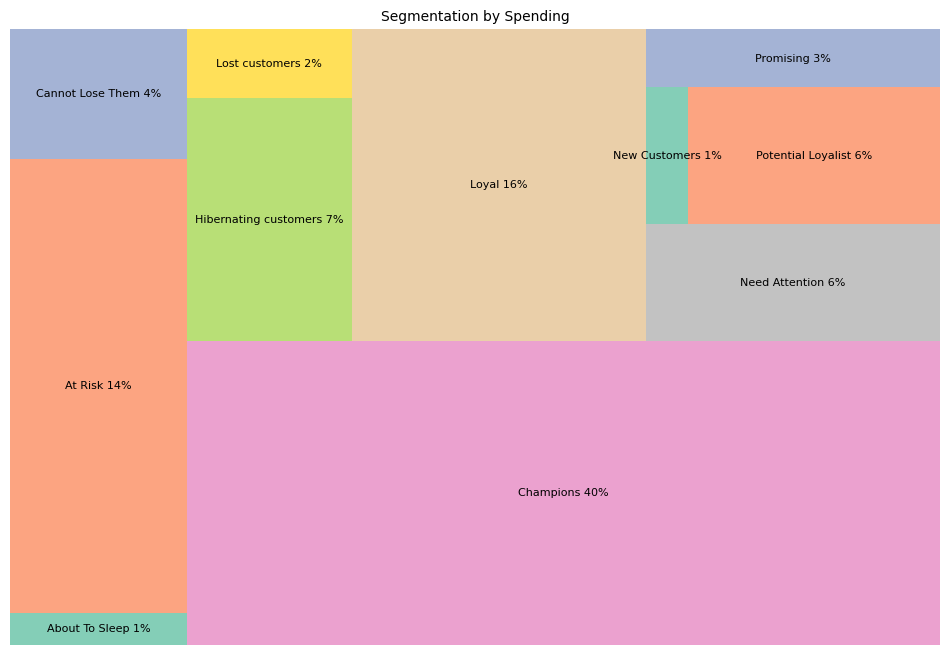

In [57]:
# Aggregate total spending for each segment
segment_by_spending = RFM_final[RFM_final.Monetary > 0][['Segment', 'Monetary']].groupby('Segment')['Monetary'].sum().reset_index().rename(columns={'Monetary': 'Spending'})

# Calculate the percentage contribution of each segment to total spending
segment_by_spending['percent_segment_by_spending'] = round(segment_by_spending['Spending'] / segment_by_spending['Spending'].sum() * 100)

# Convert percentage values to integers for better readability
segment_by_spending['percent_segment_by_spending'] = segment_by_spending['percent_segment_by_spending'].astype(int)

# Append percentage values to segment labels
segment_by_spending['Segment'] = segment_by_spending['Segment'] + ' ' + segment_by_spending['percent_segment_by_spending'].astype(str) + '%'

# Remove segments with 0% contribution
segment_by_spending = segment_by_spending[segment_by_spending.percent_segment_by_spending > 0]

# Plot a treemap to visualize spending distribution by segment
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=segment_by_spending['percent_segment_by_spending'],
    label=segment_by_spending['Segment'],
    color=sns.color_palette("Set2"),
    alpha=0.8,
    text_kwargs={'fontsize': 8}
)
plt.title("Segmentation by Spending", fontsize=10)
plt.axis('off')
plt.show()

**3. Segmentation by Frequency**

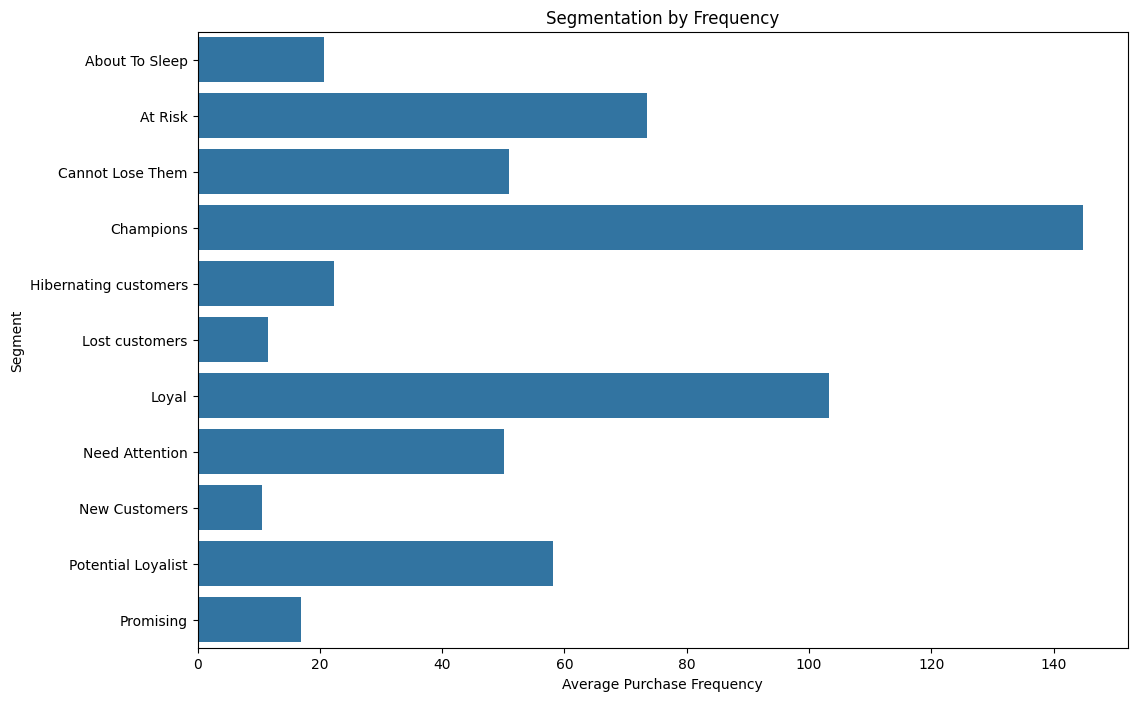

In [58]:
# Calculate the average frequency of purchases for each segment
segment_by_frequency = RFM_final[RFM_final.Frequency > 0][['Segment', 'Frequency']].groupby('Segment')['Frequency'].mean().reset_index()

# Plot a bar chart to visualize the average frequency per segment
plt.figure(figsize=(12, 8))
sns.barplot(data=segment_by_frequency, x='Frequency', y='Segment')
plt.xlabel('Average Purchase Frequency')
plt.ylabel('Segment')
plt.title('Segmentation by Frequency')
plt.show()

**4. Segmentation by Recency**

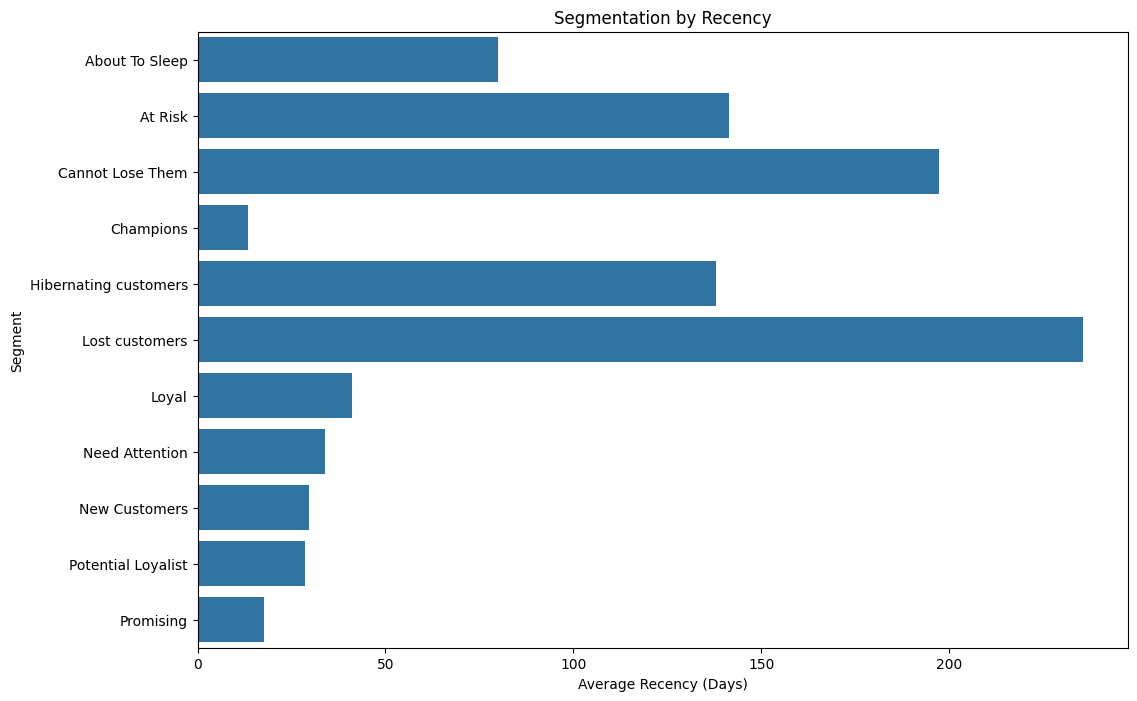

In [59]:
# Calculate the average recency (days since last purchase) for each segment
segment_by_recency = RFM_final[RFM_final.Recency > 0][['Segment', 'Recency']].groupby('Segment')['Recency'].mean().reset_index()

# Plot a bar chart to visualize the average recency per segment
plt.figure(figsize=(12, 8))
sns.barplot(data=segment_by_recency, x='Recency', y='Segment')
plt.xlabel('Average Recency (Days)')
plt.ylabel('Segment')
plt.title('Segmentation by Recency')
plt.show()

In [60]:
# Merge RFM & ecommerce_update with all columns from ecommerce_update
RFM_final_merge = RFM_final.merge(ecommerce_update, on='CustomerID', how='left')
RFM_final_merge.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM,Segment,RFM Score,...,InvoiceDate,Quantity,UnitPrice,Description,Country,Error,cancel_invoice,Date,Month,revenue
0,12347.0,2,182,4310.0,5,5,5,555,Champions,555,...,2010-12-07 14:57:00,12,4.65,BLACK EAR MUFF HEADPHONES,Iceland,NaN,False,2010-12-07,2010/12,55.80
1,12347.0,2,182,4310.0,5,5,5,555,Champions,555,...,2010-12-07 14:57:00,6,5.49,CAMOUFLAGE EAR MUFF HEADPHONES,Iceland,NaN,False,2010-12-07,2010/12,32.94
2,12347.0,2,182,4310.0,5,5,5,555,Champions,555,...,2010-12-07 14:57:00,6,5.95,BOOM BOX SPEAKER BOYS,Iceland,NaN,False,2010-12-07,2010/12,35.70
3,12347.0,2,182,4310.0,5,5,5,555,Champions,555,...,2010-12-07 14:57:00,12,1.45,BATHROOM METAL SIGN,Iceland,NaN,False,2010-12-07,2010/12,17.40
4,12347.0,2,182,4310.0,5,5,5,555,Champions,555,...,2010-12-07 14:57:00,12,1.65,RED TOADSTOOL LED NIGHT LIGHT,Iceland,NaN,False,2010-12-07,2010/12,19.80


In [61]:
RFM_final_merge['Month'] = pd.to_datetime(RFM_final_merge['Month'], format="%Y/%m")

| Segment              | R (Recency) | F (Frequency) | M (Monetary) | **Characteristics** |
|----------------------|------------|--------------|-------------|---------------------|
| **Champions (17%)**  | R **very low** (~10-20 days) | F **very high** (~200+ times) | M **highest** (~27% revenue) | The best customer group, **contributing significantly to revenue**. Should be **nurtured continuously**. |
| **Loyal (9%)**  | R **moderate** (~60 days) | F **high** (~180 times) | M **fairly high** (~13% revenue) | **Loyal customers** with a **stable purchasing frequency**. Should be **maintained and cared for**. |
| **Potential Loyalist (12%)**  | R **moderate** (~50 days) | F **moderate** (~100 times) | M **moderate** (~7% revenue) | **Potentially loyal customers** who need **more incentives to convert**. |
| **New Customers (8%)**  | R **moderate** (~40 days) | F **low** (~50 times) | M **low** (~3% revenue) | **Newly acquired customers** who need **retention strategies** to encourage repeat purchases. |
| **Promising (4%)**  | R **moderate** (~60-70 days) | F **moderate** (~50-80 times) | M **low** (~4% revenue) | Customers **showing signs of returning** but **not strongly engaged yet**. Needs **additional push**. |
| **Need Attention (6%)**  | R **high** (~120+ days) | F **moderate/low** (~50 times) | M **low** (~3-4% revenue) | Customers with **past engagement but declining activity**. **May be attracted by competitors**. |
| **At Risk (11%)**  | R **high** (~120 days) | F **moderate** (~100 times) | M **high** (~10-14% revenue) | **Previously high-value customers** who are **gradually disengaging**. **High risk of churn**. |
| **About to Sleep (4%)**  | R **high** (~100 days) | F **low** (~30 times) | M **low** (~3% revenue) | Customers **showing signs of leaving**. Requires **re-engagement strategies** before it's too late. |
| **Cannot Lose Them (3%)**  | R **very high** (~180+ days) | F **moderate** (~100 times) | M **moderate** (~4-5% revenue) | **Previously high-spending customers** who are **drifting away**. **Strong retention efforts needed**. |
| **Hibernating (18%)**  | R **very high** (~200 days) | F **very low** (~10-20 times) | M **very low** (~2% revenue) | Customers who **purchased before but have been inactive for a long time**. |
| **Lost Customers (9%)**  | R **extremely high** (220+ days) | F **extremely low** (~5-10 times) | M **very low** (~1-2% revenue) | **Nearly lost customers** with a **very low chance of returning** without **strong intervention**. |


**📊 Key Findings**
Based on the above analysis, we can see that some segments share similar characteristics. Therefore, we can group them into segment clusters for easier analysis and to propose suitable strategies as follows:

---

**Group 1: High-Risk Customers (24%)**  

📌 **Includes:** Cannot Lose Them (3%), At Risk (11%), About to Sleep (4%), Need Attention (6%)  

💡 **Reason for grouping:**  
- These customers **previously had high or moderate purchase activity** but are now **showing a significant decline in engagement**.  
- They have a **long time since their last purchase (100 - 150 days)** and previously **contributed significantly to revenue**.  
- Without intervention, they **are likely to leave completely**.  

---

**Group 2: Loyal & High-Value Customers (38%)**  

📌 **Includes:** Champions (17%), Loyal (9%), Potential Loyalist (12%)  

💡 **Reason for grouping:**  
- These are customers with **high and stable purchase frequency**.  
- They **remain highly active**, with **a relatively short time since their last purchase (10 - 50 days)**.  
- Although their **revenue contribution varies**, they all **have long-term potential if nurtured properly**.  

---

**Group 3: New & Potential Customers (25%)**  

📌 **Includes:** New Customers (17%), Promising (8%)  

💡 **Reason for grouping:**  
- This group consists mostly of **new customers or those showing signs of growth**.  
- They have **recent interactions (30 - 50 days)** but **low purchase frequency and revenue contribution**.  
- They **have the potential to become loyal customers if they continue purchasing**.  

---

**Group 4: Inactive & Lost Customers (13%)**  

📌 **Includes:** Hibernating (9%), Lost Customers (4%)  

💡 **Reason for grouping:**  
- These customers are **almost entirely disengaged**, with **a very long time since their last purchase (200+ days)**.  
- **Their purchase frequency and revenue contribution are extremely low**, making them **unlikely to return without strong intervention**.  

**5. Distribution of RFM over Time**

**5.1 Monetary**

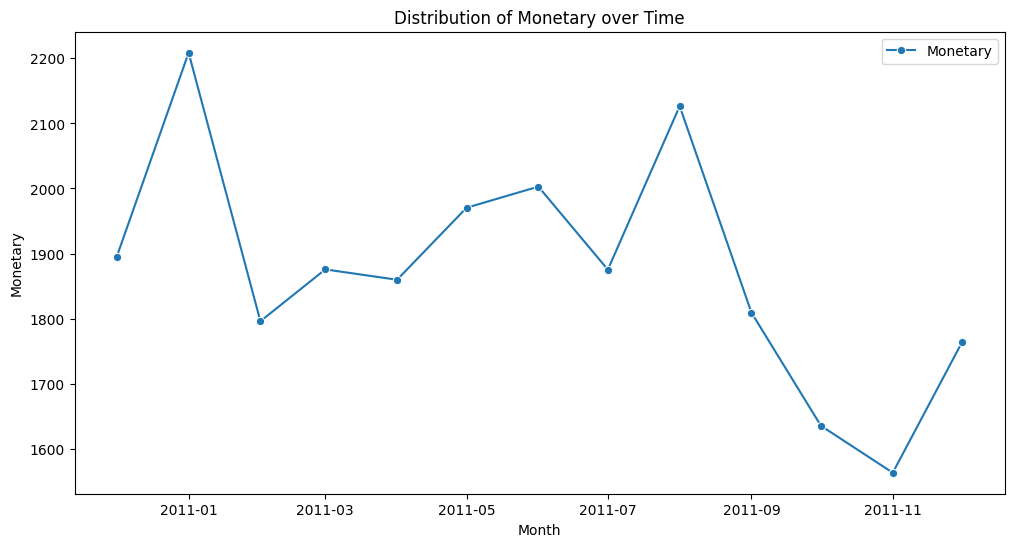

In [62]:
#Calculate avg RFM groupby month
RFM_by_month = RFM_final_merge.groupby('Month')['Monetary'].mean().reset_index()
#Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=RFM_by_month, x='Month', y='Monetary', label='Monetary', marker='o')
plt.title('Distribution of Monetary over Time')
plt.show()

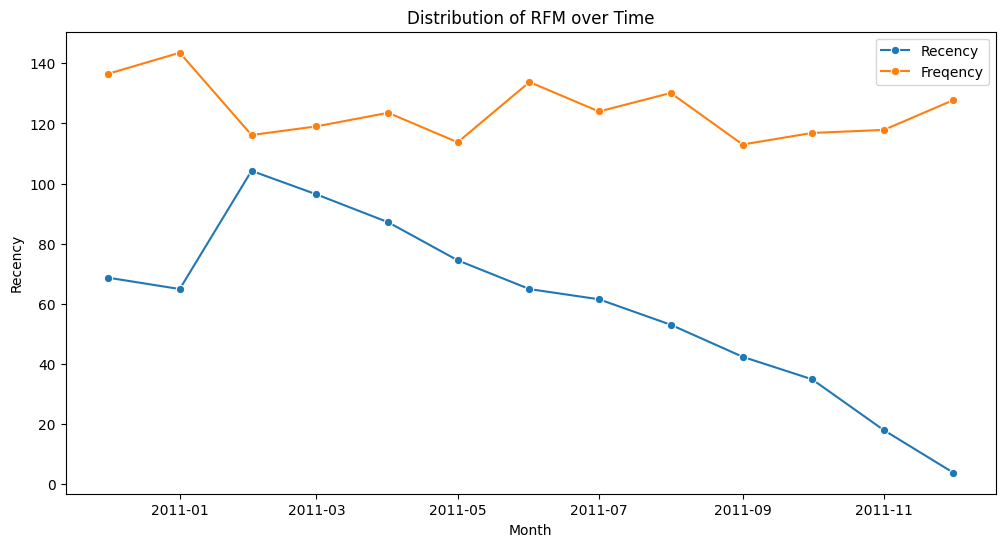

In [63]:
#Calculate avg RFM groupby month
RFM_by_month = RFM_final_merge.groupby('Month')[['Recency', 'Frequency']].mean().reset_index()
#Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=RFM_by_month, x='Month', y='Recency', label='Recency', marker='o')
sns.lineplot(data=RFM_by_month, x='Month', y='Frequency', label='Freqency', marker='o')
plt.title('Distribution of RFM over Time')
plt.show()

**RFM Analysis Overview**

**🔹 Recency:**  
- This metric tends to **decrease over time**, which is a **positive sign** as it indicates that customers are purchasing more frequently or more recently.  

**🔹 Frequency:**  
- The **purchase frequency remains relatively stable**, with slight fluctuations.  
- This suggests that customers are maintaining a certain level of engagement with the app.  

**🔹 Monetary:**  
- This metric shows **significant variations**, with sharp peaks and troughs.  
- It indicates that **customer spending is inconsistent**, potentially influenced by **promotions, seasonal effects, or shifts in purchasing behavior**.  

**📌 Next Steps:**  
🔎 **Deeper analysis** is needed to identify which **customer segments** are driving these changes.  


In [64]:
unique_segments = RFM_final_merge['Segment'].unique()
print(unique_segments)

['Champions' 'At Risk' 'Hibernating customers' 'Loyal' 'Lost customers'
 'Cannot Lose Them' 'Promising' 'New Customers' 'Need Attention'
 'Potential Loyalist' 'About To Sleep']


In [65]:
# Classify into Group Segments
high_risk = ['Cannot Lose Them', 'At Risk', 'About To Sleep', 'Need Attention']
loyal_high_value = ['Champions', 'Loyal', 'Potential Loyalist']
potential = ['New Customers', 'Promising']
lost = ['Hibernating customers', 'Lost customers']
RFM_final_merge['Group Segment'] = RFM_final_merge['Segment'].apply(
    lambda x: 'High Risk Customers' if x in high_risk else
              'Loyal & High Value' if x in loyal_high_value else
              'New & Potential' if x in potential else
              'Inactive & Lost' if x in lost else 'Others'
)


**6. Group Segment by Contribution**

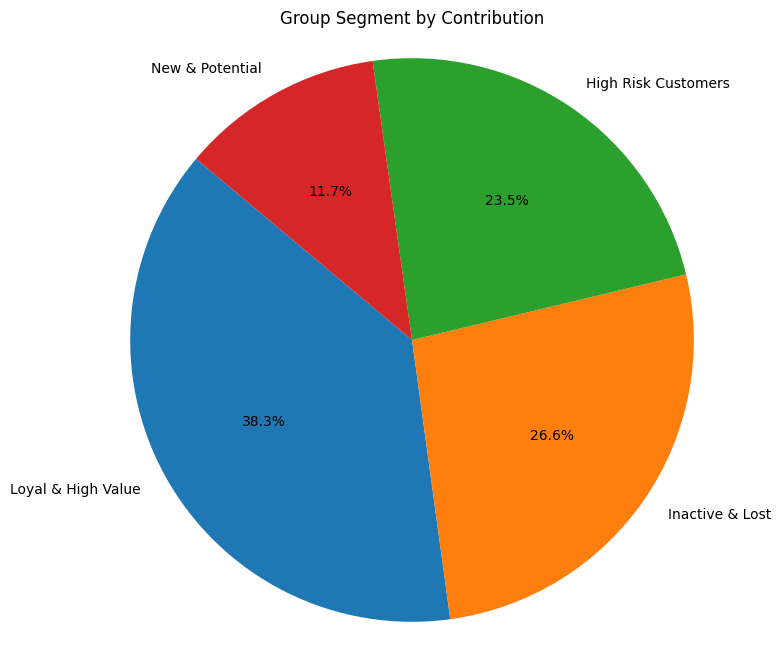

In [66]:
# Classify into Group Segments
RFM_final['Group Segment'] = RFM_final['Segment'].apply(
    lambda x: 'High Risk Customers' if x in high_risk else
              'Loyal & High Value' if x in loyal_high_value else
              'New & Potential' if x in potential else
              'Inactive & Lost' if x in lost else 'Others'
)
# Count the number of customers in each Group Segment
group_counts = RFM_final['Group Segment'].value_counts()

# Calculate the percentage share of each group
group_percentages = (group_counts / len(RFM_final)) * 100

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(group_percentages, labels=group_percentages.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Group Segment by Contribution')

plt.show()


**7. Segment Distribution Across Countries**

Vì UK contribution rất lớn so với total công ty -> Chart của Total sẽ là đại diện cho UK. Cần tách data không có UK để visualize thêm để hiểu rõ tình hình tại cái quốc gia khác

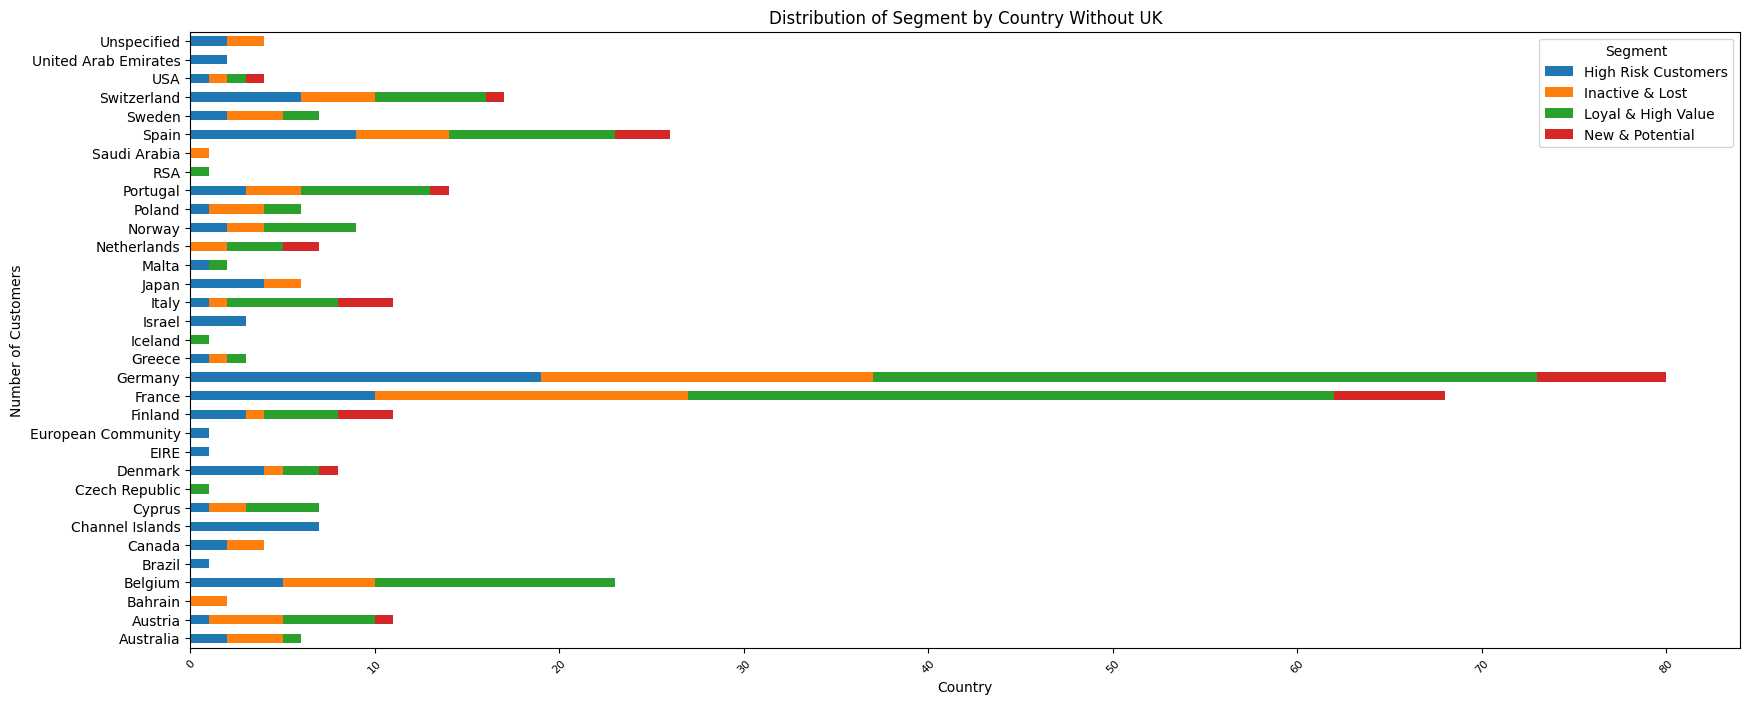

In [67]:
# Calculate segment distribution by country
segmentation_by_location = RFM_final_merge.groupby(['Country', 'Group Segment'])['CustomerID'].nunique().unstack()

# Remove 'United Kingdom'
segment_without_UK = segmentation_by_location.drop(index=['United Kingdom'])

# Plot it
segment_without_UK.plot(kind='barh', stacked=True, figsize=(20, 8))
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Distribution of Segment by Country Without UK')
plt.xticks(rotation=45, fontsize=8)
plt.legend(title='Segment')
plt.show()


**8. Segmentation Distribution Over Time**

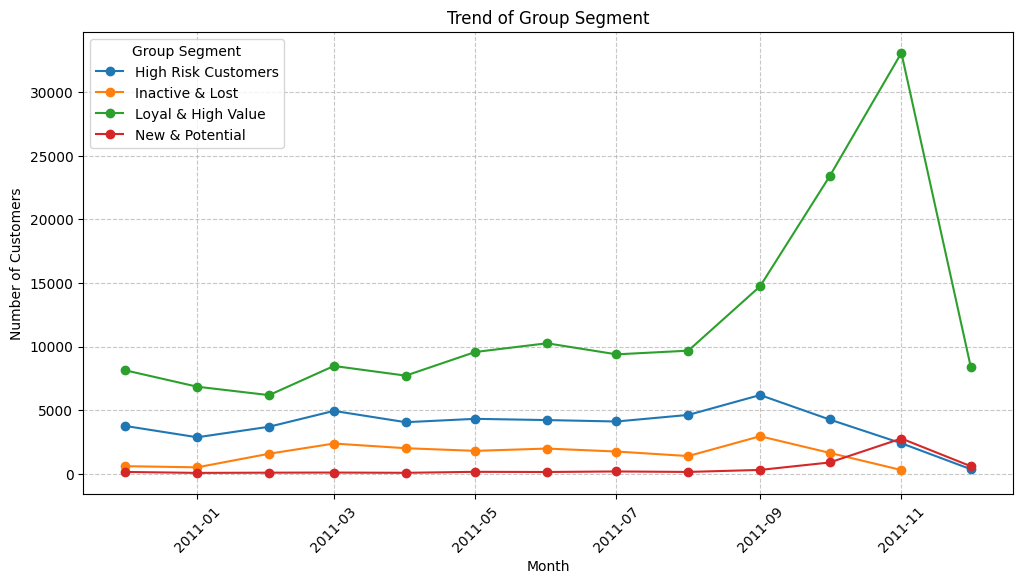

In [68]:
#Convert Month to right data type
RFM_final_merge['Month'] = pd.to_datetime(RFM_final_merge['Month'], errors='coerce')

# Count customers in each Group Segment per month
monthly_trend = RFM_final_merge.groupby(['Month', 'Group Segment']).size().reset_index(name='Count')

# Plot the trend for each Group Segment over time
plt.figure(figsize=(12, 6))
for segment in monthly_trend['Group Segment'].unique():
    data = monthly_trend[monthly_trend['Group Segment'] == segment]
    plt.plot(data['Month'], data['Count'], marker='o', label=segment)

plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Trend of Group Segment')
plt.xticks(rotation=45)
plt.legend(title='Group Segment')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()



**9. Trend of Recency, Frequency, Monetary by Month**

<Figure size 1200x600 with 0 Axes>

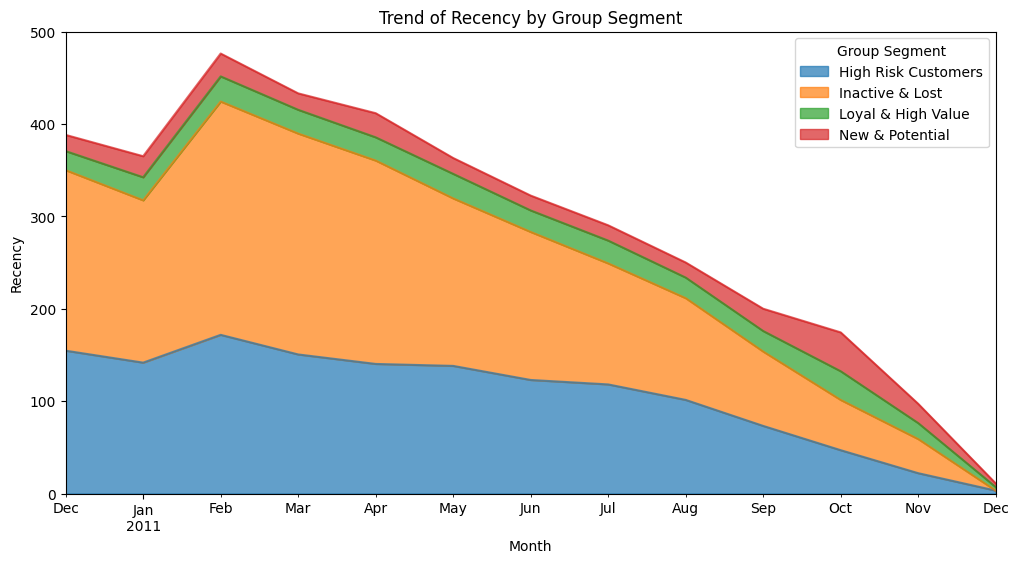

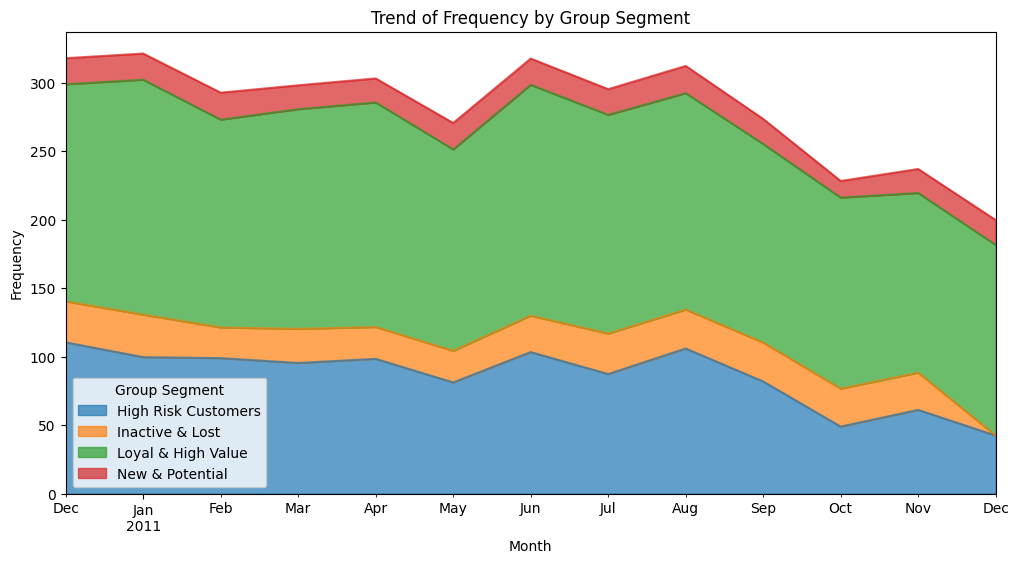

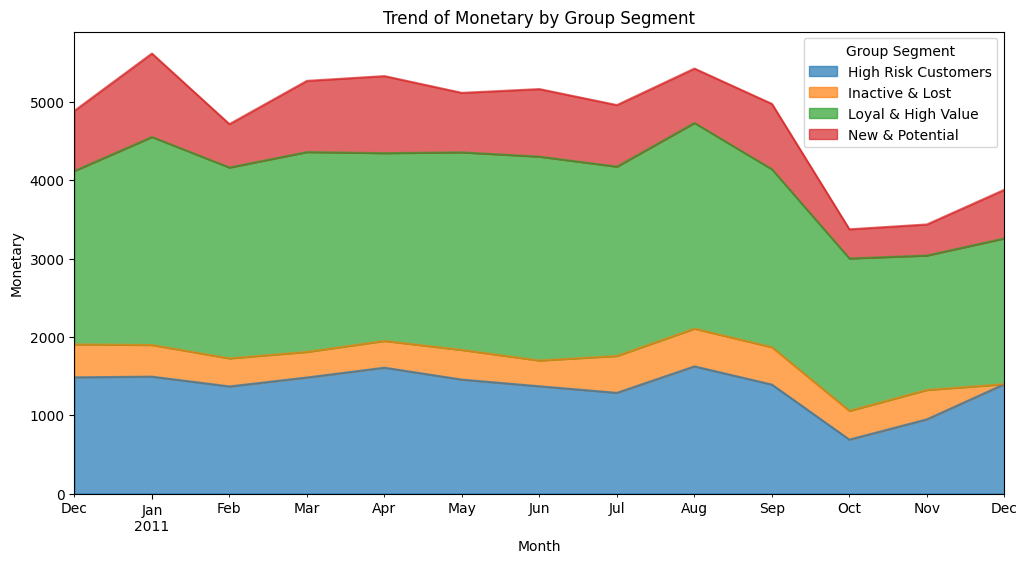

In [69]:
rfm_trend = RFM_final_merge.groupby(['Month', 'Group Segment'])[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Plot the chart
plt.figure(figsize=(12, 6))
for metric in ['Recency', 'Frequency', 'Monetary']:
    # Pivot data by Group Segment
    pivot_data = rfm_trend.pivot(index='Month', columns='Group Segment', values=metric)

    # Plot Area Chart
    pivot_data.plot(kind='area', stacked=True, alpha=0.7, figsize=(12, 6))
    plt.title(f'Trend of {metric} by Group Segment')
    plt.ylabel(metric)
    plt.xlabel('Month')
    plt.legend(title='Group Segment')
    plt.show()


# **IV. INSIGHT & RECOMMENDATION:**


## **A. Customer Segmentation Strategy**

👉🏻 Based on the insights and findings above, we would recommend the Sales & MKT team to consider the following:

**1. Loyal & High Value Group (38.3%)**  
- This group accounts for **38.3% of total customers** and contributes **the most to revenue**. They are strongly present in **key markets**.  
- Their purchasing behavior is **stable**, but **Recency is decreasing**, indicating a need for retention strategies.  
- **Total spending remains high**, showing their willingness to pay more, especially for **high-value products**.  

**🔹 Recommendation:**  
- **Analyze their preferred products** to develop **premium versions** or **expand the product lineup**.  
- **Test upselling, bundling strategies**, and **exclusive offers** to increase order value.  
- **Implement a long-term loyalty program** to retain this segment.  
- **Encourage reviews & referrals** to expand the loyal customer base.  

---

**2. High-Risk Customers (23.5%)**  
- This segment **used to have high spending but has significantly declined**.  
- Recency is **increasing**, meaning they are **purchasing less frequently**.  
- Revenue from this group is **gradually decreasing**, and without intervention, they may be lost entirely.  

**🔹 Recommendation:**  
- **Launch re-engagement campaigns** with **personalized incentives** to bring them back.  
- **Offer special vouchers or discounts** for their next purchase.  
- **Create targeted marketing content** (emails, push notifications) emphasizing product value.  
- **Reach out directly to VIP customers** to understand their reasons for disengagement and adjust strategies accordingly.  

---

**3. New & Potential Customers (11.7%)**  
- This group has **low spending but potential for growth**.  
- Purchase frequency is **still low**, requiring efforts to encourage repeat purchases.  
- Buying behavior is **increasing slightly but remains unstable**.  

**🔹 Recommendation:**  
- **Develop an onboarding strategy** to help customers explore and buy products easily.  
- **Run nurturing campaigns** to remind them of relevant products.  
- **Leverage reviews & feedback from Loyal customers** to build trust and influence purchasing decisions.  
- **Offer welcome incentives** to encourage their first or repeat purchases.  

---

**4. Inactive & Lost Customers (26.6%)**  
- This group makes up **26.6% of total customers**, but contributes **little to revenue**.  
- Recency is **very high**, meaning they haven’t purchased in a long time.  
- **Revenue from this segment continues to decline**, indicating they are likely to have left the brand.  

**🔹 Recommendation:**  
- **Send win-back emails with strong incentives** to encourage them to return.  
- **Run a "come back" campaign with personalized messaging**, reminding them why they bought before.  
- **Conduct exit surveys** to identify reasons for churn and improve the product or service.  
- **Accept that some of this group is lost** and focus resources on High-Risk or Loyal customers to optimize ROI.  

##**B. Business Recommendation**

In SuperStore's retail model, where the RFM (Recency, Frequency, Monetary) model is used for customer segmentation and marketing strategies, the primary **focus should be on Frequency (F)**.

**Why Choose Frequency (F)?**  

**🔹 Increasing Purchase Frequency = Sustainable Revenue Growth**
- If customers **buy more frequently**, revenue will **remain stable and grow**.  
- Retaining existing customers is **cheaper than acquiring new ones** (reducing Customer Acquisition Cost - CAC).  

**🔹 Insights from the Charts: High-Risk Customers & New & Potential Segments Have Low Frequency**  
- **High-Risk Customers**:  
  - Used to be valuable customers but are **buying less frequently**.  
  - Without intervention, they might **transition to the Inactive & Lost segment**.  

- **New & Potential Customers**:  
  - Still in the early stages, **low purchase frequency** means they haven't formed a habit.  
  - If they are not encouraged to buy again, they may **lose interest and churn**.  

**🔹 Even Loyal & High-Value Customers Need Retention Strategies**  
- This group **currently maintains high purchase frequency**, but **if not nurtured**, their engagement may **gradually decline**.  
- Strategies like **loyalty programs, exclusive deals, and personalized offers** can help sustain their buying behavior.  

**🔹 Key Takeaway: Focus on Frequency for Long-Term Revenue Growth**  

✅ **Encouraging repeat purchases** strengthens customer loyalty and increases revenue.  
✅ **Preventing high-risk customers from churning** ensures a stable customer base.  
✅ **Developing purchase habits for new customers** helps convert them into long-term buyers.  

